# __Pipeline 3, Pt 2__
## _Min Max --> Normalization --> 3 STD_

# Importing Data:

In [2]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [3]:
# Make sure all values that are filled in with a dash('-') are treated as NaNs. 
# This is important for proper imputation.

compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

FileNotFoundError: [Errno 2] File b'comp1data.csv' does not exist: b'comp1data.csv'

# Descriptive Statistics
- learn about our data, i.e. mean, std, min-max, etc.
- discover missing values 

In [3]:
compdata_original.shape

# do we have enough data? - YES
# 682 rows and 22 columns

(682, 22)

In [47]:
compdata_original.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [5]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [6]:
# Create a copy of the data so we aren't altering original dataframe
compdata = compdata_original.copy()

# Variable Calculations

- calculate variables per the Data Dictionary
- Handle 0 values

In [7]:
# T2 has 2 missing values, show their location

compdata.loc[compdata['T2'] == 0]


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [8]:
# Fill in the '0.0' values with the mean of T2

compdata.loc[125,'T2']=compdata['T2'].mean()
compdata.loc[199,'T2']=compdata['T2'].mean()

In [9]:
# Make sure there are no more '0.0' values

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [10]:
# T5 has negative number, show location 

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [11]:
# fill in negative T5 with mean

compdata.loc[7,'T5']=compdata['T5'].mean()

In [12]:
# Make sure there's no more negative value

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [13]:
# S1 has negative number, show location

compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [14]:
# Fill the 0, negative, and infinite values with the mean for continuous values
compdata['S1'].mean()

68.42143906020559

In [15]:
# fill in negative S1 with mean

compdata.loc[134,'S1']=compdata['S1'].mean()

In [16]:
# Make sure there's no more negative value

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [17]:
# Ratios:

 # Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing/Negative Data
- key step in Machine Learning is handling missing, zero-value, negatives, etc.

In [18]:
# look at the data types of our dataset

compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [19]:
# check to see how many missing values are in dataset

compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

## Drop Missing P Values 

In [20]:
# Drop missing P Values from DF since it is factualy information and it is not advised to impute these

compdata = compdata.dropna(how='all', subset=['P(1Day)'])

In [21]:
compdata.isna().sum()

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

Now that we've dropped the missing P values, we simply need to impute C3 and C7 as they are the only remaining missing values in the dataframe.

## Impute C3 & C7

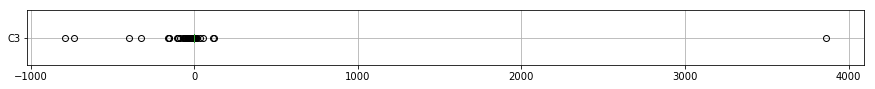

In [22]:
# C3 imputation
# check distribution to determine if mean or median should be used

compdata.boxplot(column='C3',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [23]:
# filling in missing C3 with median 

compdata['C3_'] = compdata['C3'].fillna(compdata['C3'].median())

In [24]:
compdata.isna().sum()

# as we can see below, imputed C3 (C3_) has no NaN values

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

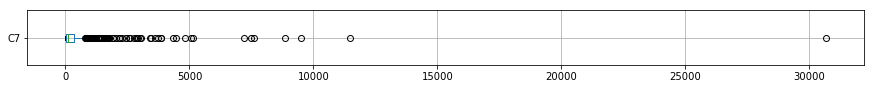

In [25]:
# C7 imputation
# check distribution to determine if mean or median should be used.


compdata.boxplot(column='C7',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [26]:
# fill in missing C7 values with median 

compdata['C7_'] = compdata['C7'].fillna(compdata['C7'].median())

In [27]:
compdata.isna().sum()

# imputed C7 (C7_) has no NaN values - good

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
C7_         0
dtype: int64

# Split DF into Separate DFs 
- key for outlier handling and normalization processes 
- do not need to do majority of work on categorical that is done on continuous

## Categorical

In [48]:
# Create DF with only categorical features
# Exclude P values and target (Y) values

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','C3_','C7_','Y1','Y2'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0


## Continuous 

In [29]:
# Create DF with only continuous features
# Drop C3, C7 as well since we have separate imputed columns for these 
# Drop T1, T2 as they were used to calculate T3 


compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','C2','C3','C6','C7','Y1','Y2','T1','T2','T3','T4','T5','C5','S1','S2','S3'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C3_,C5_,C6_,C7_
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.43,3.864345,11.111111,51.345
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,-1.62,12.028832,0.000000,25.936
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,-1.24,3.369134,0.000000,7.378
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,-0.91,3.299697,0.000000,8.526
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,0.07,3.726269,5.000000,632.298


In [30]:
compdata_cont.isna().sum()

# check for null values

C1     0
C4     0
T3_    0
T4_    0
T5_    0
S1_    0
S2_    0
S3_    0
C3_    0
C5_    0
C6_    0
C7_    0
dtype: int64

## Target Variables

In [31]:
# create a separate DF for only our target variables

target_vals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','C7_'], axis=1)
target_vals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


# Outlier Detection
- determine outliers and use proper techniques to remove them

In [32]:
compdata_cont.shape

(660, 12)

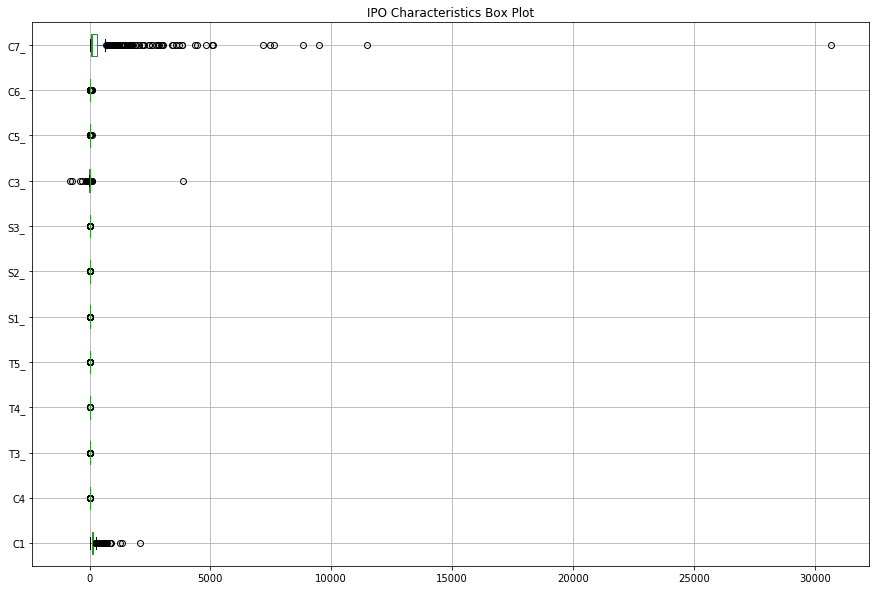

In [34]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers

compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

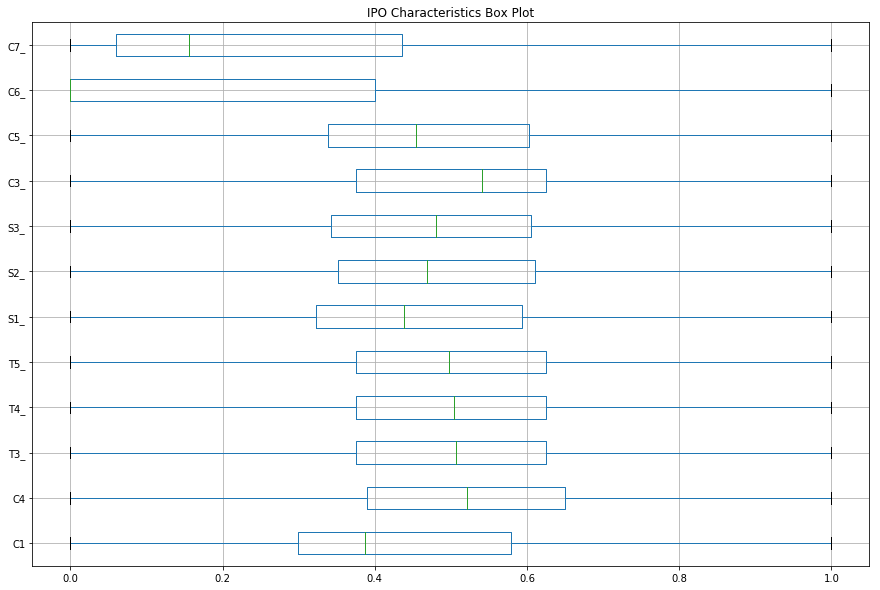

In [52]:
# visualize outliers again to make sure they've been removed
# looks like it was successful as it appears there are no more outliers below

compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

# Min-Max
- use this to fit everything into a range of 0 and 1

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


compdata_cont = scaler.fit_transform(compdata_cont)

compdata_cont = pd.DataFrame(compdata_cont)

# lost columns names, so re-defining them

compdata_cont.columns = ['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C3_','C5_','C6_','C7_']


In [42]:
compdata_cont.describe()

# looks like it worked as the max and mins are 1 and 0 respectively 

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C3_,C5_,C6_,C7_
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.466482,0.511836,0.480269,0.502032,0.504195,0.470261,0.498137,0.490806,0.486988,0.491270,0.226921,0.305552
std,0.255740,0.187110,0.208896,0.185703,0.189201,0.210688,0.200629,0.202996,0.258831,0.217252,0.334435,0.336652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299252,0.389826,0.375000,0.375000,0.375000,0.323044,0.351299,0.342294,0.375000,0.338457,0.000000,0.060007
50%,0.387032,0.521497,0.507031,0.503893,0.496929,0.438733,0.468926,0.480832,0.540971,0.454520,0.000000,0.155714
75%,0.579551,0.649710,0.625000,0.625000,0.625000,0.593826,0.610780,0.605376,0.625000,0.603074,0.400000,0.436004
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalization
- we will now look into the skewness of our data and normalize using specific methods depending on the skewness of each column

## Skewness

In [ ]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt

# plot skewness using histogram 

f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 1])
sns.distplot( compdata_cont["C7_"] , ax=axes[2, 2])
plt.show()

In [54]:
compdata_cont.skew()

# check if its left or right skewed

# close to 0 is best [-.5 - .5]

# If it is Positive Skew: use --> log, sqrt, cbrt
    
# If it is Negative Skew: use --> exponential

C1     0.836620
C4    -0.314465
T3_   -0.545971
T4_   -0.073967
T5_    0.110769
S1_    0.608468
S2_    0.694781
S3_    0.476608
C3_   -0.390284
C5_    0.724354
C6_    1.201653
C7_    1.177072
dtype: float64

In [55]:
compdata_cont['T3_'] = compdata_cont['T3_'].apply(np.exp)
compdata_cont['T3_'].skew()

0.03757528430702887

In [56]:
compdata_cont['C4'] = compdata_cont['C4'].apply(np.exp)
compdata_cont['C4'].skew()

0.14770367279722382

In [57]:
# Positive skew

compdata_cont['S3_'] = compdata_cont['S3_'].apply(np.sqrt)
compdata_cont['S3_'].skew()

-0.2888659714388118

In [58]:
# Positive skew

compdata_cont['C1'] = compdata_cont['C1'].apply(np.sqrt)
compdata_cont['C1'].skew()

-0.005593781029685582

In [59]:
# Positive skew

compdata_cont['S1_'] = compdata_cont['S1_'].apply(np.sqrt)
compdata_cont['S1_'].skew()

-0.1176405339976025

In [60]:
# Positive skew

compdata_cont['S2_'] = compdata_cont['S2_'].apply(np.sqrt)
compdata_cont['S2_'].skew()

0.07649191618289317

In [61]:
# Positive skew

compdata_cont['C5_'] = compdata_cont['C5_'].apply(np.sqrt)
compdata_cont['C5_'].skew()

-0.013406335058719788

In [62]:
# Positive skew

compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'].skew()

0.48100774103954885

In [63]:
compdata_cont['C7_'] = compdata_cont['C7_'].apply(np.cbrt)
compdata_cont['C7_'].skew()

0.17902745385183044

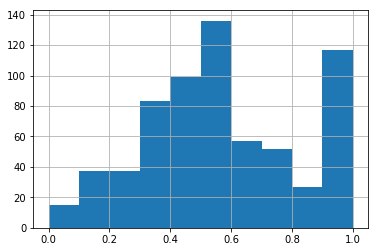

In [64]:
compdata_cont['C7_'].hist()

In [65]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C3_,C5_,C6_,C7_
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.655973,1.697170,1.650767,0.502032,0.504195,0.667457,0.691329,0.684199,0.486988,0.683201,0.383295,0.572793
std,0.190356,0.310091,0.328878,0.185703,0.189201,0.157478,0.142237,0.150706,0.258831,0.156664,0.486519,0.258383
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.547039,1.476724,1.454992,0.375000,0.375000,0.568369,0.592705,0.585059,0.375000,0.581770,0.000000,0.391503
50%,0.622119,1.684548,1.660354,0.503893,0.496929,0.662368,0.684781,0.693420,0.540971,0.674181,0.000000,0.537992
75%,0.761282,1.914986,1.868246,0.625000,0.625000,0.770601,0.781524,0.778059,0.625000,0.776578,0.999860,0.758281
max,1.000000,2.718282,2.718282,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3 STD

In [66]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].mean() + 3* compdata_cont[col].std()
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [67]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].mean() - 3* compdata_cont[col].std()
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

In [68]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C3_,C5_,C6_,C7_
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.655973,1.696965,1.650278,0.502032,0.504195,0.667457,0.691329,0.684199,0.486988,0.683201,0.383295,0.572793
std,0.190356,0.309451,0.327343,0.185703,0.189201,0.157478,0.142237,0.150706,0.258831,0.156664,0.486519,0.258383
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.547039,1.476724,1.454992,0.375000,0.375000,0.568369,0.592705,0.585059,0.375000,0.581770,0.000000,0.391503
50%,0.622119,1.684548,1.660354,0.503893,0.496929,0.662368,0.684781,0.693420,0.540971,0.674181,0.000000,0.537992
75%,0.761282,1.914986,1.868246,0.625000,0.625000,0.770601,0.781524,0.778059,0.625000,0.776578,0.999860,0.758281
max,1.000000,2.627444,2.637400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

In [69]:
#compdata_cont_corr = compdata_cont.corr()
#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(compdata_cont, annot=True, cbar=True, cmap='Blues')
#plt.title("Correlation between Variables")
#plt.show()

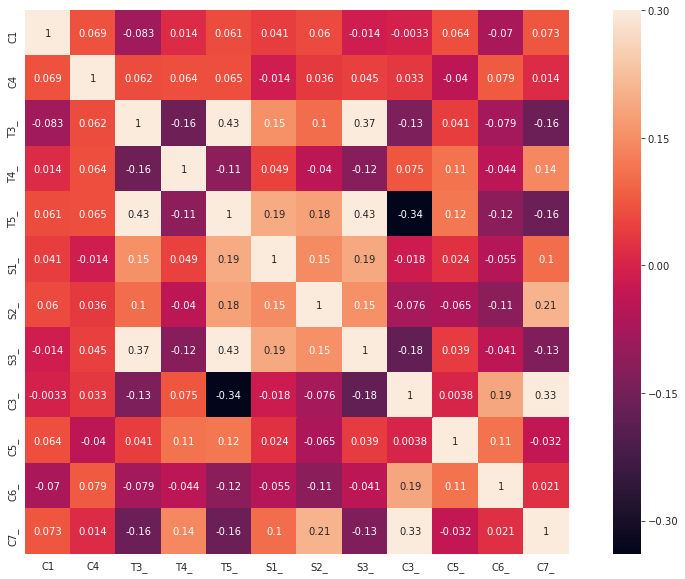

In [70]:
cont_corr = compdata_cont.corr()

with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(cont_corr, vmax=.3, square=True,annot=True)

# Binning

## Identify values in I3 that have multiple values and replace them with 1.
- we discovered (via some handy Excel work) that some values in I3 had multiple SIC codes.
- need to replace these first.

In [71]:
compdata_cat[compdata_cat["I1"]=='DLB']

,I1,I2,I3,C2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",1.0


In [72]:
compdata_cat[compdata_cat["I1"]=='DTSI']

,I1,I2,I3,C2
187,DTSI,"DTS, INC.","3651, 6794, 7819",0.0


In [73]:
compdata_cat[compdata_cat["I1"]=='RLD']

,I1,I2,I3,C2
499,RLD,RealD Inc.,"3663, 3861, 6794",1.0


In [74]:
compdata_cat[compdata_cat["I1"]=='UPG']

,I1,I2,I3,C2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",0.0


## Replace I3 values with one value.
- placed them in sensible industry based on the most common industries of the 4 values.

In [75]:
# adding to manufacturing 

compdata_cat.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [76]:
# adding to nonclassifiable 

compdata_cat.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [77]:
# adding to manufacturing

compdata_cat.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [78]:
# adding to nonclassifiable 

compdata_cat.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [79]:
# adding to services

compdata_cat.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [80]:
# make I3 a numerical column so we can properly bin

compdata_cat["I3"] = pd.to_numeric(compdata_cat["I3"])

## SIC Code Bins

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-0999 | Agriculture, Forestry and Fishing |
| 1000-1499 | Mining |
| 1800-1999 | not used |
| 2000-3999 | Manufacturing |
| 4000-4999 | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199 | Wholesale Trade |
| 5200-5999 | Retail Trade |
| 6000-6799 | Finance, Insurance and Real Estate |
| 7000-8999 | Services |
| 9100-9729 | Public Administration |
| 9900-9999 | Nonclassifiable |


In [81]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins'] = compdata_cat['I3'].apply(assign_I3_bins)  

compdata_cat.head()

,I1,I2,I3,C2,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,5
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,5
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,5
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,6


## Analyze the Bins

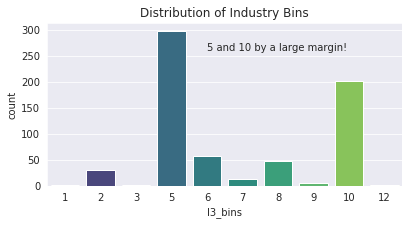

In [82]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,3))

# PLOT - distribution of industry bins
plt.subplot(1,2,1)
plt.text(4,260,"5 and 10 by a large margin!")
ax = sns.countplot(x="I3_bins", data=compdata_cat, palette="viridis")
ax.set(title="Distribution of Industry Bins")

plt.show()

- it is clear that bin 5, which is Manufacturing, and bin 10, which is Services, dominate the distribution.
- the other remaining bins are not even close to the top 2, so let's bin these in an 'Other' category and only use 3 bins.

## SIC Code Bins (REVISED)

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-1999 | Other |
| 2000-3999 | Manufacturing |
| 4000-6799 | Other |
| 7000-8999 | Services |
| 9100-9999 | Other |


In [83]:
def assign_I3_bins_new(I3):
    if I3 >= 100 and I3 <= 1999:                          
        return(1)
    if I3 >= 2000 and I3 <= 3999:                  
        return(2)
    if I3 >= 4000 and I3 <= 6799:                  
        return(1)
    if I3 >= 7000 and I3 <= 8999:                  
        return(3)
    if I3 >= 9000 and I3 <= 9999:                  
        return(1)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins_new'] = compdata_cat['I3'].apply(assign_I3_bins_new)  

compdata_cat.head()

,I1,I2,I3,C2,I3_bins,I3_bins_new
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,5,2
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,5,2
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,5,2
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,5,2
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,6,1


# Feature Selection

In [84]:
data_p3_2 = pd.concat([compdata_cont,compdata_cat,target_vals], axis=1)

data_p3_2.to_csv('../project1-deadlinedemons/data_p3_2.csv', index=0)

## Split Train and Test Data

In [85]:
train, test = train_test_split(data_p3_2, test_size=0.2)
train.to_csv('../project1-deadlinedemons/training_p3_2.csv', index=0)
test.to_csv('../project1-deadlinedemons/test_p3_2.csv', index=0)

-----------------------------------